**Identificação**: BRENO ALAN ALVES MARQUES (2462286)

# [Domótica] Classificar as tarefas mais rotineiras de uma habitação
## Avaliar os métodos de aprendizado de máquina


### Iniciando DataSet 

* Carregando o DataSets de treinamento e testes

In [87]:
import pandas as pd
data_set_for_train = pd.read_csv('https://github.com/brolam/sbdia-projeto-I/raw/main/data/data_set_for_train.csv')
data_set_for_test = pd.read_csv('https://github.com/brolam/sbdia-projeto-I/raw/main/data/data_set_for_test.csv')

* Exibir atributos do DataSet

In [88]:
data_set_for_train.head()

,Unnamed: 0,PeriodOfDayCode,PeriodOfDay,DayOfWeekCode,DayOfWeek,EnergyUseClassCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabit
0,43244,2,LateNight,3,Sunday,2,9595.789,1,Someone is taking a shower
1,43247,2,LateNight,3,Sunday,2,9565.718,1,Someone is taking a shower
2,43245,2,LateNight,3,Sunday,2,9645.115,1,Someone is taking a shower
3,43243,2,LateNight,3,Sunday,2,9517.447,1,Someone is taking a shower
4,140230,2,LateNight,3,Sunday,2,8623.760,1,Someone is taking a shower


* Carregar o Normatizador e normatizar a base de treinamento e testes

In [89]:
from sklearn.preprocessing import StandardScaler
from urllib.request import urlopen

scaler_data_set = load(urlopen('https://github.com/brolam/sbdia-projeto-I/raw/main/models/scaler_data_set.pkl'))
train_standardized = scaler_data_set.fit_transform(data_set_for_train[['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal', 'WattsTotal']])
test_standardized = scaler_data_set.fit_transform(data_set_for_test[['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal', 'WattsTotal']])



* Exibir dataset de treinamento Normatizado

In [90]:
train_standardized

array([[-0.24749691,  0.73859427,  4.53072244,  4.53072244],
       [-0.24749691,  0.73859427,  4.51520427,  4.51520427],
       [-0.24749691,  0.73859427,  4.55617717,  4.55617717],
       ...,
       [ 0.94318143,  0.00902853, -0.32087073, -0.32087073],
       [ 0.94318143,  0.00902853, -0.24532193, -0.24532193],
       [ 0.94318143,  0.00902853, -0.25961495, -0.25961495]])

## Aplicando o algoritmo RandomForest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#Realizar o treinamento:
random_forest_classifier = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_classifier.fit(train_standardized, data_set_for_train.EnergyConsumptionHabitCode.values)

#Obter resultado da previsão 
random_forest_predict = random_forest_classifier.predict(test_standardized)

 * Aplicando o algorítimo RandomForest - Exbir Precisão

In [84]:
accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, random_forest_predict)

0.9994326509384899

 * Aplicando o algoritmo RandomForest - Matriz de Confusão

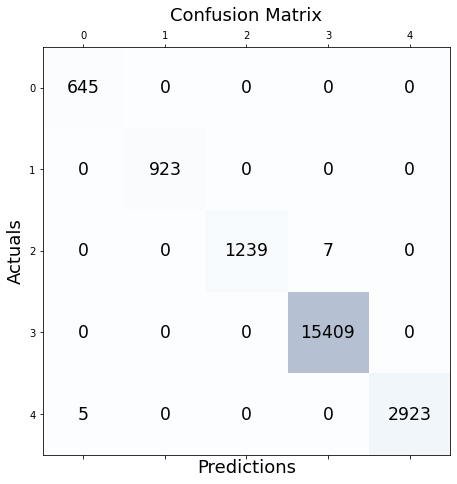

In [92]:
import matplotlib.pyplot as plt
random_forest_conf_matrix = confusion_matrix(data_set_for_test.EnergyConsumptionHabitCode.values, random_forest_predict)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(random_forest_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(random_forest_conf_matrix.shape[0]):
    for j in range(random_forest_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=random_forest_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

* Aplicando o algoritmo RandomForest  - Listar inconsistências

In [93]:
data_set_for_test['EnergyConsumptionHabitCodePredict'] = random_forest_predict
random_forest_diff = data_set_for_test[ data_set_for_test.EnergyConsumptionHabitCode != data_set_for_test.EnergyConsumptionHabitCodePredict]
random_forest_diff[['PeriodOfDay', 'DayOfWeekCode', 'WattsTotal', 'EnergyConsumptionHabitCode', 'EnergyConsumptionHabitCodePredict'] ]

,PeriodOfDay,DayOfWeekCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabitCodePredict
2337,LateNight,4,183.32710,999,0
6130,EarlyMorning,4,184.64600,999,0
8808,Morning,1,600.62710,2,3
8831,Morning,1,601.41840,2,3
10145,Morning,0,601.94600,2,3
10202,Morning,0,600.89080,2,3
13692,Noon,0,600.62710,2,3
15747,Eve,1,600.09950,2,3
15857,Eve,1,601.94600,2,3
19913,Night,4,184.64600,999,0


## Aplicando o algoritmo MLPClassifier

In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#Realizar o treinamento:
mlp_classifier = MLPClassifier(verbose=False, max_iter=3, tol=0.000010)
mlp_classifier.fit(train_standardized, data_set_for_train.EnergyConsumptionHabitCode.values)

#Obter resultado da previsão 
mlp_classifier_predict = mlp_classifier.predict(test_standardized)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


 * Aplicando o algorítimo MLPClassifier - Exbir Precisão

In [97]:
accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, mlp_classifier_predict)

0.9882275069736656

 * Aplicando o algorítimo MLPClassifier - Matriz de Confusão

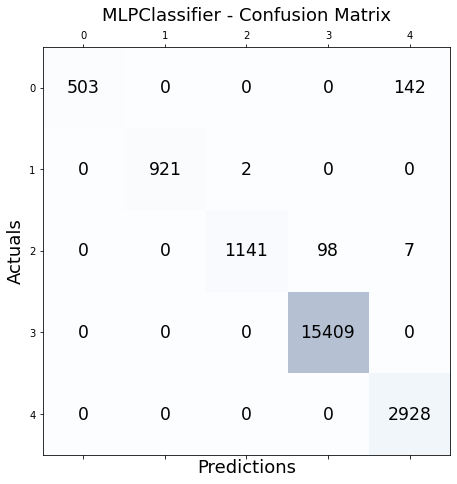

In [98]:
import matplotlib.pyplot as plt
mlp_classifier_conf_matrix = confusion_matrix(data_set_for_test.EnergyConsumptionHabitCode.values, mlp_classifier_predict)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(mlp_classifier_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(mlp_classifier_conf_matrix.shape[0]):
    for j in range(mlp_classifier_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=mlp_classifier_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('MLPClassifier - Confusion Matrix', fontsize=18)
plt.show()

* Aplicando o algoritmo MLPClassifier - Listar inconsistências

In [99]:
data_set_for_test['EnergyConsumptionHabitCodePredictMlp'] = mlp_classifier_predict
mlp__forest_diff = data_set_for_test[ data_set_for_test.EnergyConsumptionHabitCode != data_set_for_test.EnergyConsumptionHabitCodePredictMlp]
mlp__forest_diff[['PeriodOfDay', 'DayOfWeekCode', 'WattsTotal', 'EnergyConsumptionHabitCode', 'EnergyConsumptionHabitCodePredictMlp'] ]

,PeriodOfDay,DayOfWeekCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabitCodePredictMlp
5218,EarlyMorning,1,734.891100,2,3
6385,EarlyMorning,4,160.905800,0,999
6386,EarlyMorning,4,169.874330,0,999
6389,EarlyMorning,4,160.114460,0,999
6390,EarlyMorning,4,156.421550,0,999
...,...,...,...,...,...
20241,Night,4,125.295500,0,999
20242,Night,4,122.393930,0,999
20243,Night,4,120.283676,0,999
20244,Night,4,125.031715,0,999


## Aplicando o algoritmo GaussianNB

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

#Realizar o treinamento:
nb_classifier = GaussianNB()
nb_classifier.fit(train_standardized, data_set_for_train.EnergyConsumptionHabitCode.values)

#Obter resultado da previsão 
nb_classifier_predict = nb_classifier.predict(test_standardized)

 * Aplicando o algoritmo GaussianNB - Exibir Precisão

In [79]:
accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, nb_classifier_predict)

0.8294170488392983

 * Aplicando o algoritmo GaussianNB - Matriz de Confusão

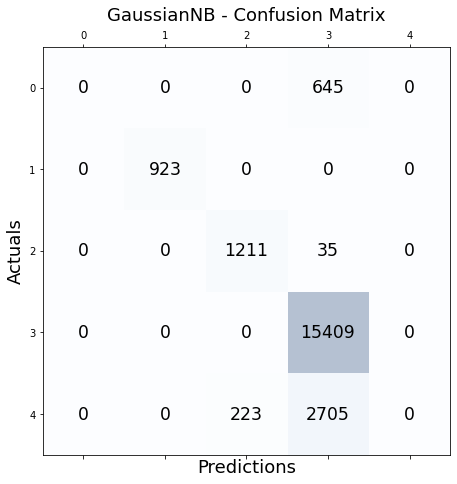

In [101]:
import matplotlib.pyplot as plt
nb_classifier_conf_matrix = confusion_matrix(data_set_for_test.EnergyConsumptionHabitCode.values, nb_classifier_predict)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(nb_classifier_conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(nb_classifier_conf_matrix.shape[0]):
    for j in range(nb_classifier_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=nb_classifier_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('GaussianNB - Confusion Matrix', fontsize=18)
plt.show()

* Aplicando o algoritmo GaussianNB - Listar inconsistências

In [102]:
data_set_for_test['EnergyConsumptionHabitCodePredictNb'] = nb_classifier_predict
nb__forest_diff = data_set_for_test[ data_set_for_test.EnergyConsumptionHabitCode != data_set_for_test.EnergyConsumptionHabitCodePredictNb]
nb__forest_diff[['PeriodOfDay', 'DayOfWeekCode', 'WattsTotal', 'EnergyConsumptionHabitCode', 'EnergyConsumptionHabitCodePredictNb'] ]

,PeriodOfDay,DayOfWeekCode,WattsTotal,EnergyConsumptionHabitCode,EnergyConsumptionHabitCodePredictNb
2058,LateNight,4,291.476900,999,3
2059,LateNight,4,259.559540,999,3
2060,LateNight,4,284.354830,999,3
2061,LateNight,4,282.772160,999,3
2062,LateNight,4,289.366640,999,3
...,...,...,...,...,...
20241,Night,4,125.295500,0,3
20242,Night,4,122.393930,0,3
20243,Night,4,120.283676,0,3
20244,Night,4,125.031715,0,3


## Comparar os resultados obtidos

In [111]:
print('Resultado RandomForest: ', round(accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, random_forest_predict) * 100,2))
print('Resultado MLPClassifier: ', round(accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, mlp_classifier_predict) * 100,2))
print('Resultado GaussianNB: ', round(accuracy_score(data_set_for_test.EnergyConsumptionHabitCode.values, nb_classifier_predict) * 100,2))

Resultado RandomForest:  99.94
Resultado MLPClassifier:  98.82
Resultado GaussianNB:  82.94


* Comparando a precisão e velocidade para criar o modelo, o algoritmo RandomForest obteve a melhor precisão com o menor tempo para gerar o modelo. Sendo assim, o algoritmo RandomForest será implantado para realizar as previsões sobre a base de consumo de energia no mês de novembro.


## Implantar o Modelo e realizar previsões

* Salvar o modelo

In [112]:
from pickle import dump
dump(random_forest_classifier, open('random_forest_classifier.pkl', 'wb'))

* Carregar o modelo salvo

In [113]:
from pickle import load

random_forest_classifier = load(open('random_forest_classifier.pkl', 'rb'))

* Carregar dataset do mês de Setembro 2021

In [114]:
import pandas as pd
data_set_2021_9 = pd.read_csv('https://github.com/brolam/sbdia-projeto-I/raw/main/data/OHA-2021-9.csv')

 * Carregar LabelEncoder e Normatizador

In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from urllib.request import urlopen

encoder_period_of_day = load(urlopen('https://github.com/brolam/sbdia-projeto-I/raw/main/models/encoder_period_of_day.pkl'))
encoder_day_of_week = load(urlopen('https://github.com/brolam/sbdia-projeto-I/raw/main/models/encoder_day_of_week.pkl'))
scaler_data_set = load(urlopen('https://github.com/brolam/sbdia-projeto-I/raw/main/models/scaler_data_set.pkl'))

* Adicionar as colunas PeriodOfDayCode e DayOfWeekCode no data_set_2021_9   

In [116]:
data_set_2021_9["PeriodOfDayCode"] = encoder_period_of_day.transform(data_set_2021_9.PeriodOfDay)
data_set_2021_9["DayOfWeekCode"] = encoder_day_of_week.transform(data_set_2021_9.DayOfWeek)

* Selecionar os atributos previsoes normatizados

In [117]:
data_set_standardized = scaler_data_set.fit_transform(data_set_2021_9[['PeriodOfDayCode', 'DayOfWeekCode', 'WattsTotal', 'WattsTotal']])

* Realizar a previsão e adiconar a coluna EnergyConsumptionHabitCode com o resultado da previsão

In [118]:
data_set_2021_9['EnergyConsumptionHabitCode'] = random_forest_classifier.predict(data_set_standardized)

* Adicionar o label para o atributo 

In [119]:
def get_energy_consumption_habit_title(energy_consumption_habit_code):
  if (energy_consumption_habit_code == 0 ):
    return 'Out of home'
  elif (energy_consumption_habit_code == 1):
    return 'Someone is taking a shower'
  elif (energy_consumption_habit_code == 2):
    return 'Someone is washing clothes'
  elif (energy_consumption_habit_code == 3):
    return 'Someone is cooking'
  else:
    return 'Undefined'

data_set_2021_9['EnergyConsumptionHabit'] = data_set_2021_9['EnergyConsumptionHabitCode'].apply(get_energy_consumption_habit_title)

* Exibir o data_set_2021_9 após a previsão

In [120]:
data_set_2021_9

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayCode,DayOfWeekCode,EnergyConsumptionHabitCode,EnergyConsumptionHabit
0,1,0,LateNight,Wednesday,1630465201,14,107.886024,8070.08540,0,8177.97100,2,6,1,Someone is taking a shower
1,1,0,LateNight,Wednesday,1630465215,14,104.720665,8050.82900,0,8155.55000,2,6,1,Someone is taking a shower
2,1,0,LateNight,Wednesday,1630465229,14,105.248220,8057.16060,0,8162.40870,2,6,1,Someone is taking a shower
3,1,0,LateNight,Wednesday,1630465243,14,99.972620,8172.95950,0,8272.93300,2,6,1,Someone is taking a shower
4,1,0,LateNight,Wednesday,1630465257,14,105.248220,8148.95560,0,8254.20300,2,6,1,Someone is taking a shower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181430,30,20,Eve,Thursday,1633044117,14,232.126400,128.19708,0,360.32350,1,4,3,Someone is cooking
181431,30,20,Eve,Thursday,1633044159,14,226.323240,122.39392,0,348.71713,1,4,3,Someone is cooking
181432,30,20,Eve,Thursday,1633044201,14,222.366550,155.63020,0,377.99673,1,4,3,Someone is cooking
181433,30,20,Eve,Thursday,1633044215,14,223.949220,159.05934,0,383.00858,1,4,3,Someone is cooking


* Somar o tempo agrupado por  de energia por Hábito de Consumo

In [128]:
data_set_2021_9.groupby('EnergyConsumptionHabit')['Duration'].sum() / 3600

EnergyConsumptionHabit
Out of home                    23.003333
Someone is cooking            524.985000
Someone is taking a shower     29.785833
Someone is washing clothes     40.082778
Undefined                      90.215278
Name: Duration, dtype: float64